# Head Pose Image Database

http://www-prima.inrialpes.fr/perso/Gourier/Faces/HPDatabase.html
## このデータベースを利用する目的：

さまざまな顔の向きで顔を検出できるかどうかを評価する。

各pitch, yaw の組み合わせに対して、３０枚の画像があり、
顔向きごとの検出率を評価できる。

## 評価上の注意点：

- 背景がフラットな画像になっているので、背景が込み入っている時の検出率を評価できない。
- 被験者が欧米人に偏っている。
- 照明条件の多様性がない。
- 表情の変化が少ない（口を開けたりはしていない）


In [1]:
%matplotlib inline
import pandas as pd
import os

In [2]:
import glob
dataset = "headPose"
names = glob.glob("headPose/Person*/*.jpg")
names.sort()

In [3]:
import dlibCnnFace as faceDetector
faceDetector.processDatabase(dataset, names)

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


# headPose dataset の検出処理後のデータ解析

     name  truePositives  falsePositives  angles  pitch  yaws
num                                                          
0      50             50              50      50     50    50
     name  truePositives  falsePositives  angles  pitch  yaws
num                                                          
0       1              1               1       1      1     1


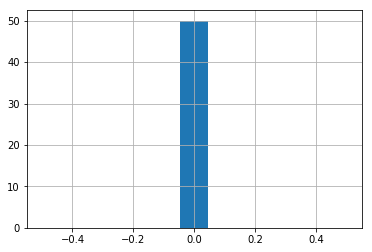

In [4]:
import pandas as pd
df = pd.read_csv("log_headPose_0.csv")
import readheadPose
pitches = []
yaws = []
angles = []
for index, rows in df.iterrows():
#    print index, rows["name"]
    pitch, yaw = readheadPose.getAngles(rows["name"])
    pitches.append(float(pitch))    
    yaws.append(float(yaw))    
    angles.append("%s_%s" % (pitch, yaw))

df["angles"] = angles
df["pitch"] = pitches
df["yaws"] = yaws
df["num"].hist(bins=11)
print df.groupby("num").count()
print df.groupby("num").count()/float(df.shape[0])
#print df.groupby("angles", "num").count()



In [5]:
print df.groupby("angles").count()

         name  num  truePositives  falsePositives  pitch  yaws
angles                                                        
+0_+0       1    1              1               1      1     1
+0_+30      1    1              1               1      1     1
+0_+45      1    1              1               1      1     1
+0_+60      1    1              1               1      1     1
+0_+90      1    1              1               1      1     1
+0_-15      1    1              1               1      1     1
+0_-45      1    1              1               1      1     1
+0_-60      1    1              1               1      1     1
+0_-75      1    1              1               1      1     1
+15_+60     1    1              1               1      1     1
+15_-15     1    1              1               1      1     1
+15_-30     1    1              1               1      1     1
+15_-60     1    1              1               1      1     1
+30_+60     1    1              1               1      

In [6]:
print df.groupby("angles").mean()

         num  truePositives  falsePositives  pitch  yaws
angles                                                  
+0_+0      0              0               0      0     0
+0_+30     0              0               0      0    30
+0_+45     0              0               0      0    45
+0_+60     0              0               0      0    60
+0_+90     0              0               0      0    90
+0_-15     0              0               0      0   -15
+0_-45     0              0               0      0   -45
+0_-60     0              0               0      0   -60
+0_-75     0              0               0      0   -75
+15_+60    0              0               0     15    60
+15_-15    0              0               0     15   -15
+15_-30    0              0               0     15   -30
+15_-60    0              0               0     15   -60
+30_+60    0              0               0     30    60
+30_+75    0              0               0     30    75
+30_+90    0              0    

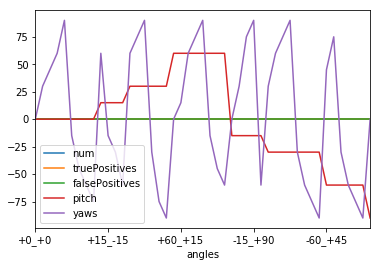

In [7]:
df.groupby("angles").mean().plot()

In [8]:
table = df.groupby("angles").mean()
print table

         num  truePositives  falsePositives  pitch  yaws
angles                                                  
+0_+0      0              0               0      0     0
+0_+30     0              0               0      0    30
+0_+45     0              0               0      0    45
+0_+60     0              0               0      0    60
+0_+90     0              0               0      0    90
+0_-15     0              0               0      0   -15
+0_-45     0              0               0      0   -45
+0_-60     0              0               0      0   -60
+0_-75     0              0               0      0   -75
+15_+60    0              0               0     15    60
+15_-15    0              0               0     15   -15
+15_-30    0              0               0     15   -30
+15_-60    0              0               0     15   -60
+30_+60    0              0               0     30    60
+30_+75    0              0               0     30    75
+30_+90    0              0    

In [9]:
table.to_csv("table.csv")

In [10]:
table.sort_values("num")

,num,truePositives,falsePositives,pitch,yaws
angles,,,,,
+0_+0,0,0,0,0,0
+60_-45,0,0,0,60,-45
+60_-60,0,0,0,60,-60
-15_+0,0,0,0,-15,0
-15_+30,0,0,0,-15,30
-15_+75,0,0,0,-15,75
-15_+90,0,0,0,-15,90
-15_-60,0,0,0,-15,-60
-30_+30,0,0,0,-30,30


In [11]:
X = table["yaws"]
Y = table["pitch"]
Z = table["num"]


import pylab as plt
plt.contour(X, Y, Z)

import numpy as np

yawsAr = np.array((-90, -75, -60, -45, -30, -15, 0,15,30,45,60,75,90))


pitchsAr = np.array((-60, -45, -30, -15, 0, 15, 30, 45, 60))

X, Y = np.meshgrid(yawsAr, pitchesAr)


In [12]:
df["num"].mean()


0.0

In [13]:
print df[df["num"]==0]


                                       name  num  truePositives  \
0   headPose/Person01/person01167+30-75.jpg    0              0   
1   headPose/Person01/person01125-30+75.jpg    0              0   
2   headPose/Person01/person01238-15+75.jpg    0              0   
3    headPose/Person01/person01243+0-45.jpg    0              0   
4    headPose/Person01/person01248+0+30.jpg    0              0   
5   headPose/Person01/person01257+15-30.jpg    0              0   
6   headPose/Person01/person01186+60+15.jpg    0              0   
7   headPose/Person01/person01267+30-75.jpg    0              0   
8   headPose/Person01/person01182+60-45.jpg    0              0   
9   headPose/Person01/person01214-30-90.jpg    0              0   
10  headPose/Person01/person01277+30+75.jpg    0              0   
11   headPose/Person01/person01185+60+0.jpg    0              0   
12  headPose/Person01/person01190+60+75.jpg    0              0   
13  headPose/Person01/person01112-60+75.jpg    0              

pitch　が 90 のデータは検出されていないものが多いことがわかる。

In [14]:
print df[df["pitch"]==90]

Empty DataFrame
Columns: [name, num, truePositives, falsePositives, angles, pitch, yaws]
Index: []


In [15]:
print df[df["pitch"]==90].groupby("num").count()

Empty DataFrame
Columns: [name, truePositives, falsePositives, angles, pitch, yaws]
Index: []


30 枚中の17 枚で検出がなかったことを示している。


In [16]:
print df[df["num"]==2]


Empty DataFrame
Columns: [name, num, truePositives, falsePositives, angles, pitch, yaws]
Index: []


In [17]:
print df["truePositives"]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: truePositives, dtype: int64


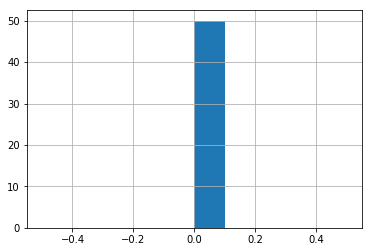

In [18]:
df["truePositives"].hist()

In [19]:
df.shape


(50, 7)

In [20]:
print df.groupby("truePositives").count()

               name  num  falsePositives  angles  pitch  yaws
truePositives                                                
0                50   50              50      50     50    50


In [21]:
2754/2790.0


0.9870967741935484

In [22]:
df[df["truePositives"]==0].count()

name              50
num               50
truePositives     50
falsePositives    50
angles            50
pitch             50
yaws              50
dtype: int64

In [23]:
df[df["truePositives"]==0].count()/float(df.shape[0])


name              1
num               1
truePositives     1
falsePositives    1
angles            1
pitch             1
yaws              1
dtype: float64

未検出は 1.25% である。

In [24]:
df[df["truePositives"]==0]


,name,num,truePositives,falsePositives,angles,pitch,yaws
0,headPose/Person01/person01167+30-75.jpg,0,0,0,+30_-75,30,-75
1,headPose/Person01/person01125-30+75.jpg,0,0,0,-30_+75,-30,75
2,headPose/Person01/person01238-15+75.jpg,0,0,0,-15_+75,-15,75
3,headPose/Person01/person01243+0-45.jpg,0,0,0,+0_-45,0,-45
4,headPose/Person01/person01248+0+30.jpg,0,0,0,+0_+30,0,30
5,headPose/Person01/person01257+15-30.jpg,0,0,0,+15_-30,15,-30
6,headPose/Person01/person01186+60+15.jpg,0,0,0,+60_+15,60,15
7,headPose/Person01/person01267+30-75.jpg,0,0,0,+30_-75,30,-75
8,headPose/Person01/person01182+60-45.jpg,0,0,0,+60_-45,60,-45
9,headPose/Person01/person01214-30-90.jpg,0,0,0,-30_-90,-30,-90
